<a href="https://colab.research.google.com/github/dmnarula/football-ds-learning/blob/main/week4-modeling/Week4_Modeling.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [9]:
%cd /content
!rm -rf football-ds-learning
!git clone https://github.com/dmnarula/football-ds-learning.git

/content
Cloning into 'football-ds-learning'...
remote: Enumerating objects: 305, done.
remote: Counting objects: 100% (108/108), done.
remote: Compressing objects: 100% (108/108), done.
remote: Total 305 (delta 43), reused 0 (delta 0), pack-reused 197 (from 2)
Receiving objects: 100% (305/305), 5.41 MiB | 13.99 MiB/s, done.
Resolving deltas: 100% (138/138), done.


In [10]:
%cd football-ds-learning
!ls

/content/football-ds-learning
fonts	   sample_data	week1-python-basics  week3-visualization
README.md  src		week2-pandas	     week4-modeling


In [11]:
!pip install adjustText
from adjustText import adjust_text

In [12]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot  as plt
import os
import sys
sys.path.append("../..")
from src.merging import build_match_df, get_gw_urls
from src.fonts import register_font, set_plot_style
from sklearn.linear_model import LinearRegression

FONTS = set_plot_style()

In [13]:
# Team colors
team_colors = {
    "ARS": "#EF0107",   # Arsenal
    "AVL": "#670E36",   # Aston Villa
    "BOU": "#DA291C",   # Bournemouth
    "BRE": "#EF2B2D",   # Brentford
    "BHA": "#0057B8",   # Brighton
    "CHE": "#034694",   # Chelsea
    "CRY": "#1B458F",   # Crystal Palace
    "EVE": "#003399",   # Everton
    "FUL": "#000000",   # Fulham
    "LEE": "#FFCD00",   # Leeds United (yellow)
    "LIV": "#C8102E",   # Liverpool
    "MCI": "#6CABDD",   # Man City
    "MUN": "#DA291C",   # Man Utd
    "NEW": "#241F20",   # Newcastle
    "NFO": "#DD0000",   # Nottingham Forest
    "SUN": "#E03A3E",   # Sunderland (red)
    "TOT": "#132257",   # Tottenham
    "WHU": "#7A263A",   # West Ham
    "WOL": "#FDB913",   # Wolves
    "BUR": "#6C1D45"    # Burnley (claret)
}

In [14]:
# Season data loader
def build_season_df(start_gw, end_gw):
  all_gw_dfs = []

  for gw in range(start_gw, end_gw + 1):
    url_stats, url_players, url_teams, url_matches = get_gw_urls(gw)

    df_gw = build_match_df(
        url_stats=url_stats,
        url_players=url_players,
        url_teams=url_teams,
        url_matches=url_matches
    )

    df_gw["gameweek"]=gw
    all_gw_dfs.append(df_gw)

  return pd.concat(all_gw_dfs, ignore_index=True)

In [15]:
url_stats, url_players, url_teams, url_matches = get_gw_urls(15)
df_matches = pd.read_csv(url_matches)
df_matches.head(100)

,gameweek,kickoff_time,home_team,home_team_elo,home_score,away_score,away_team,away_team_elo,finished,match_id,...,away_walking_distance,home_running_distance,away_running_distance,home_sprinting_distance,away_sprinting_distance,home_number_of_sprints,away_number_of_sprints,home_top_speed,away_top_speed,tournament
0,15.0,2025-12-06T17:30:00,2.0,1718.70,3.0,3.0,14.0,1917.61,True,25-26-prem-leeds-united-vs-liverpool,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,prem
1,15.0,2025-12-07T16:30:00,54.0,1775.79,1.0,2.0,31.0,1837.82,True,25-26-prem-fulham-vs-crystal-palace,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,prem
2,15.0,2025-12-06T12:30:00,7.0,1890.53,2.0,1.0,3.0,2038.72,True,25-26-prem-aston-villa-vs-arsenal,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,prem
3,15.0,2025-12-06T15:00:00,11.0,1797.06,3.0,0.0,17.0,1773.69,True,25-26-prem-everton-vs-nottingham-forest,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,prem
4,15.0,2025-12-06T15:00:00,91.0,1796.38,0.0,0.0,8.0,1896.87,True,25-26-prem-afc-bournemouth-vs-chelsea,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,prem
5,15.0,2025-12-06T15:00:00,43.0,1963.13,3.0,0.0,56.0,1652.47,True,25-26-prem-manchester-city-vs-sunderland,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,prem
6,15.0,2025-12-06T15:00:00,6.0,1802.07,2.0,0.0,94.0,1813.20,True,25-26-prem-tottenham-hotspur-vs-brentford,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,prem
7,15.0,2025-12-06T15:00:00,4.0,1866.28,2.0,1.0,90.0,1696.85,True,25-26-prem-newcastle-united-vs-burnley,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,prem
8,15.0,2025-12-07T14:00:00,36.0,1842.47,1.0,1.0,21.0,1726.95,True,25-26-prem-brighton-hove-albion-vs-west-ham-un...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,prem
9,15.0,2025-12-08T20:00:00,39.0,1653.75,1.0,4.0,1.0,1817.47,True,25-26-prem-wolverhampton-wanderers-vs-manchest...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,prem


In [16]:
df_season = build_season_df(1, 14)
df_season_nogk = df_season[df_season["position"] != "Goalkeeper"]
# df_season.shape
# df_season.head()
# df_season["gameweek"].value_counts().sort_index()
# df_season.isna().mean().sort_values(ascending=False).head(100)

In [17]:
stats_cols = ["minutes_played", "goals", "assists",
              "total_shots", "xg", "xa", "shots_on_target",
              "final_third_passes", "successful_dribbles", "successful_dribbles_percent",
              "touches_opposition_box", "touches", "chances_created",
              "accurate_passes", "accurate_passes_percent",
              "accurate_crosses", "accurate_crosses_percent",
              "accurate_long_balls", "accurate_long_balls_percent"]
player_cols = ["player_code", "player_id", "web_name", "team_code", "position"]
match_cols  = ["gameweek", "home_team", "away_team",
                "match_id", "home_score", "away_score",
               "home_team_name", "home_team_short_name",
               "away_team_name", "away_team_short_name"]
team_cols   = ["team_name", "team_short_name"]
cols = (stats_cols
        + player_cols
        + match_cols
        + team_cols)

df_season_clean = df_season_nogk[cols].copy()
df_season_clean.head()

,minutes_played,goals,assists,total_shots,xg,xa,shots_on_target,final_third_passes,successful_dribbles,successful_dribbles_percent,...,away_team,match_id,home_score,away_score,home_team_name,home_team_short_name,away_team_name,away_team_short_name,team_name,team_short_name
0,80,0,0,0,0.00,0.02,0,6,0,0.0,...,3,25-26-prem-manchester-united-vs-arsenal,0.0,1.0,Man Utd,MUN,Arsenal,ARS,Man Utd,MUN
1,90,0,0,1,0.15,0.09,0,0,3,0.0,...,3,25-26-prem-manchester-united-vs-arsenal,0.0,1.0,Man Utd,MUN,Arsenal,ARS,Arsenal,ARS
2,79,2,0,2,0.92,0.01,2,2,1,0.0,...,94,25-26-prem-nottingham-forest-vs-brentford,3.0,1.0,Nott'm Forest,NFO,Brentford,BRE,Nott'm Forest,NFO
3,84,0,1,3,0.38,0.28,0,7,2,0.0,...,94,25-26-prem-nottingham-forest-vs-brentford,3.0,1.0,Nott'm Forest,NFO,Brentford,BRE,Nott'm Forest,NFO
4,90,0,1,3,0.39,0.28,1,12,0,0.0,...,94,25-26-prem-nottingham-forest-vs-brentford,3.0,1.0,Nott'm Forest,NFO,Brentford,BRE,Nott'm Forest,NFO


In [18]:
df_player_season = (
    df_season_clean
    .groupby(["player_id", "web_name", "team_short_name", "position"], as_index=False)
    .agg({
        "minutes_played": "sum",
        "xg": "sum",
        "xa": "sum",
        "goals": "sum",
        "assists": "sum",
        "total_shots": "sum",
        "final_third_passes": "sum",
        "successful_dribbles": "sum",
        "touches_opposition_box": "sum",
        "touches": "sum",
        "chances_created": "sum",
        "accurate_passes": "sum",
        "accurate_crosses": "sum",
        "accurate_long_balls": "sum"

    })
)


df_player_season.head()

,player_id,web_name,team_short_name,position,minutes_played,xg,xa,goals,assists,total_shots,final_third_passes,successful_dribbles,touches_opposition_box,touches,chances_created,accurate_passes,accurate_crosses,accurate_long_balls
0,5,Gabriel,ARS,Defender,990,0.82,0.77,1,2,8,61,1,15,848,4.0,627,0,20
1,6,Saliba,ARS,Defender,815,0.26,0.41,0,0,2,53,2,6,863,1.0,729,1,21
2,7,Calafiori,ARS,Defender,1087,2.46,0.32,1,2,22,49,10,35,746,4.0,404,3,12
3,8,J.Timber,ARS,Defender,1109,2.88,0.78,2,2,15,76,8,46,816,13.0,447,2,8
4,10,Lewis-Skelly,ARS,Defender,132,0.00,0.02,0,0,0,6,2,3,107,0.0,71,0,1


In [19]:
# Aggregate metrics

# xGI & GI
df_player_season["xgi"] = df_player_season["xg"] + df_player_season["xa"]
df_player_season["gi"] = df_player_season["goals"] + df_player_season["assists"]


# Involvement %
df_player_season["team_xgi"] = (df_player_season.groupby("team_short_name")["xgi"].transform("sum"))
df_player_season["involvement_pct"] = (df_player_season["xgi"] / df_player_season["team_xgi"]).round(2)

# Possession contribution
df_player_season["team_total_touches"] = (df_player_season.groupby("team_short_name")["touches"].transform("sum"))
df_player_season["possession_contribution"] = (df_player_season["touches"] / df_player_season["team_total_touches"]).round(2)

df_player_season[df_player_season["web_name"] == "Haaland"]

,player_id,web_name,team_short_name,position,minutes_played,xg,xa,goals,assists,total_shots,...,chances_created,accurate_passes,accurate_crosses,accurate_long_balls,xgi,gi,team_xgi,involvement_pct,team_total_touches,possession_contribution
249,430,Haaland,MCI,Forward,1218,13.69,1.15,15,3,56,...,8.0,110,0,2,14.84,18,46.22,0.32,9708,0.03


In [20]:
# Per 90 metrics

minutes_factor = df_player_season["minutes_played"] / 90
minutes_factor = minutes_factor.replace(0, np.nan)

per90_cols = [
    "xg",
    "xa",
    "xgi",
    "goals",
    "assists",
    "gi",
    "total_shots",
    "final_third_passes",
    "successful_dribbles",
    "touches_opposition_box",
    "touches",
    "chances_created",
    "accurate_passes",
    "accurate_crosses",
    "accurate_long_balls",
]

for col in per90_cols:
  df_player_season[f"{col}_per90"] = (df_player_season[col] / minutes_factor).round(2)

df_player_season[df_player_season["web_name"] == "Muñoz"]


,player_id,web_name,team_short_name,position,minutes_played,xg,xa,goals,assists,total_shots,...,gi_per90,total_shots_per90,final_third_passes_per90,successful_dribbles_per90,touches_opposition_box_per90,touches_per90,chances_created_per90,accurate_passes_per90,accurate_crosses_per90,accurate_long_balls_per90
139,256,Muñoz,CRY,Defender,1259,1.78,2.0,3,2,15,...,0.36,1.07,3.22,0.07,3.0,49.54,0.5,20.59,0.5,0.93


In [21]:
per90_cols_label = [f"{col}_per90" for col in per90_cols]


print(per90_cols_label)

# df_player_season_per90 = df_player_season[]

['xg_per90', 'xa_per90', 'xgi_per90', 'goals_per90', 'assists_per90', 'gi_per90', 'total_shots_per90', 'final_third_passes_per90', 'successful_dribbles_per90', 'touches_opposition_box_per90', 'touches_per90', 'chances_created_per90', 'accurate_passes_per90', 'accurate_crosses_per90', 'accurate_long_balls_per90']


In [22]:
df_player_season_per90 = df_player_season[["player_id", "web_name", "team_short_name", "position", "minutes_played"] + per90_cols_label]
df_player_season_per90[df_player_season_per90["web_name"] == "Haaland"]

,player_id,web_name,team_short_name,position,minutes_played,xg_per90,xa_per90,xgi_per90,goals_per90,assists_per90,gi_per90,total_shots_per90,final_third_passes_per90,successful_dribbles_per90,touches_opposition_box_per90,touches_per90,chances_created_per90,accurate_passes_per90,accurate_crosses_per90,accurate_long_balls_per90
249,430,Haaland,MCI,Forward,1218,1.01,0.08,1.1,1.11,0.22,1.33,4.14,1.26,0.44,7.32,24.61,0.59,8.13,0.0,0.15


In [32]:
# General plotting function

def plot_season_scatter(df, x_var, y_var, *, fonts):
  season_df = df[
      (df["minutes_played"] > 180) &
      (df["position"] != "Goalkeeper")
      ]
  if season_df.empty:
    return

  # Building scatterplot

  plt.figure(figsize=(16,9), facecolor="#f2f2f2")

  # Dot colors
  custom_colors = {
      team: team_colors.get(team, "#4a4a4a")
      for team in season_df["team_short_name"].unique()
  }

  sns.scatterplot(
      data=season_df,
      x=x_var,
      y=y_var,
      s=75,
      alpha=0.7,
      hue="team_short_name",
      palette=custom_colors,
      edgecolor="black"
  )

  # Using fonts dict
  title_font    = fonts["title"]
  subtitle_font = fonts["subtitle"]
  dot_label_font = fonts["dot"]
  axis_font     = fonts["axis"]
  label_font    = fonts["label"]
  tick_font     = fonts["tick"]
  footer_font   = fonts["footer"]

  # Labels and legend
  ax = plt.gca()
  # gw = season_df['gameweek'].iloc[0].astype(int)
  # match_subtitle = f"{match_df['home_team_name'].iloc[0]} vs. {match_df['away_team_name'].iloc[0]} (GW{gw})"
  ax.set_xlabel(x_var, fontproperties=axis_font, labelpad=18)
  ax.set_ylabel(y_var, fontproperties=axis_font, labelpad=18)
  ax.set_title(f"{x_var} vs {y_var}", fontproperties=title_font, pad=50)
  # ax.text(
  #     0.5, 1.02,
  #     match_subtitle,
  #     ha="center",
  #     va="bottom",
  #     alpha=0.6,
  #     transform=ax.transAxes,
  #     fontproperties=subtitle_font
  # )
  leg = ax.legend(title=None,
                  frameon=True,
                  prop=dot_label_font,
                  bbox_to_anchor=(1, 1),
                  loc="upper left")

  # Axes
  ax = plt.gca()
  ax.tick_params(axis='both', which='both')
  for tick in ax.get_xticklabels():
    tick.set_fontproperties(tick_font)
  for tick in ax.get_yticklabels():
    tick.set_fontproperties(tick_font)



  # Locking x and y axis max - no empty space expansion
  x_min, x_max = ax.get_xlim()
  y_min, y_max = ax.get_ylim()

  ax.set_xlim(x_min, season_df[x_var].max() * 1.1)
  ax.set_ylim(y_min, season_df[y_var].max() * 1.1)

  x_min, x_max = ax.get_xlim()
  y_min, y_max = ax.get_ylim()


  # Set tick increments
  plt.xticks(np.arange(round(x_min, 0), round(x_max, 1), max(((x_max + x_min)/5).round(1), 0.1)))
  plt.yticks(np.arange(round(y_min, 0), round(y_max, 1), max(((y_max + y_min)/5).round(1), 0.1)))

  # Dot labels
  texts=[]
  # At least 3 step
  label_df = season_df[(season_df[x_var] > ((x_max + x_min)*3/5)).round(1) | (season_df[y_var] > ((y_max + y_min)*3/5)).round(1)]
  for _, row in label_df.iterrows():
      x = row[x_var]
      y = row[y_var]

      texts.append(
          ax.text(
              x + 0.01,
              y - 0.004,
              row["web_name"],
              fontproperties=dot_label_font
          )
      )

  # Misc text
  plt.figtext(
      0.04, -0.01,
      "Data: olbauday (GitHub)  •  @dmnarula_27",
      ha="left",
      fontproperties=footer_font,
      color="#666666"
  )

  # Remove top and right border
  sns.despine()

  # # Lines
  # split = 0.4
  # plt.axvline(x=split, color="#e0a81b", linestyle=":", linewidth=2, alpha=0.8)
  # plt.axhline(y=split, color="#e0a81b", linestyle=":", linewidth=2, alpha=0.8)

  # # Quadrant shading & text
  # from matplotlib.patches import Rectangle

  # # Top right - elite
  # if x_max > split and y_max > split:
  #   ax.add_patch(Rectangle(
  #       (split, split),
  #       x_max - split,
  #       y_max - split,
  #       facecolor="#e0a81b",
  #       alpha=0.1,
  #       edgecolor="none"
  #   ))

  #   elite_x = (split + x_max) / 2
  #   elite_y = (split + y_max) / 2
  #   ax.text(
  #       elite_x, elite_y,
  #       "Elite",
  #       ha="center", va="center",
  #       fontsize=14,
  #       color="#e0a81b",
  #       alpha=0.9
  #   )

  # # Top left - creative
  # if x_min < split and y_max > split:
  #   ax.add_patch(Rectangle(
  #       (x_min, split),
  #       split - x_min,
  #       y_max - split,
  #       facecolor="#999999",
  #       alpha=0.1,
  #       edgecolor="none"
  #   ))

  #   creative_x = (x_min + split) / 2
  #   creative_y = (split + y_max) / 2
  #   ax.text(
  #       creative_x, creative_y,
  #       "Creative",
  #       ha="center", va="center",
  #       fontsize=14,
  #       color="#999999",
  #       alpha=1
  #   )

  # # Bottom right - threat
  # if x_max > split and y_min < split:
  #   ax.add_patch(Rectangle(
  #       (split, y_min),
  #       x_max - split,
  #       split - y_min,
  #       facecolor="#999999",
  #       alpha=0.1,
  #       edgecolor="none"
  #   ))

  #   threat_x = (split + x_max) / 2
  #   threat_y = (y_min + split) / 2
  #   ax.text(
  #       threat_x, threat_y,
  #       "Threat",
  #       ha="center", va="center",
  #       fontsize=14,
  #       color="#999999",
  #       alpha=1
  #   )

  adjust_text(
      texts,
      arrowprops=dict(arrowstyle="-", color="gray", lw=0.6)
  )

  # save_title = f"{match_df['home_team_short_name'].iloc[0]}-vs-{match_df['away_team_short_name'].iloc[0]}_xg_xa_gw{gw}.png"

  # plt.savefig(
  #     os.path.join("match_figs", save_title),
  #     dpi=300,
  #     bbox_inches="tight",
  #     facecolor=plt.gcf().get_facecolor()
  #   )


  plt.show()

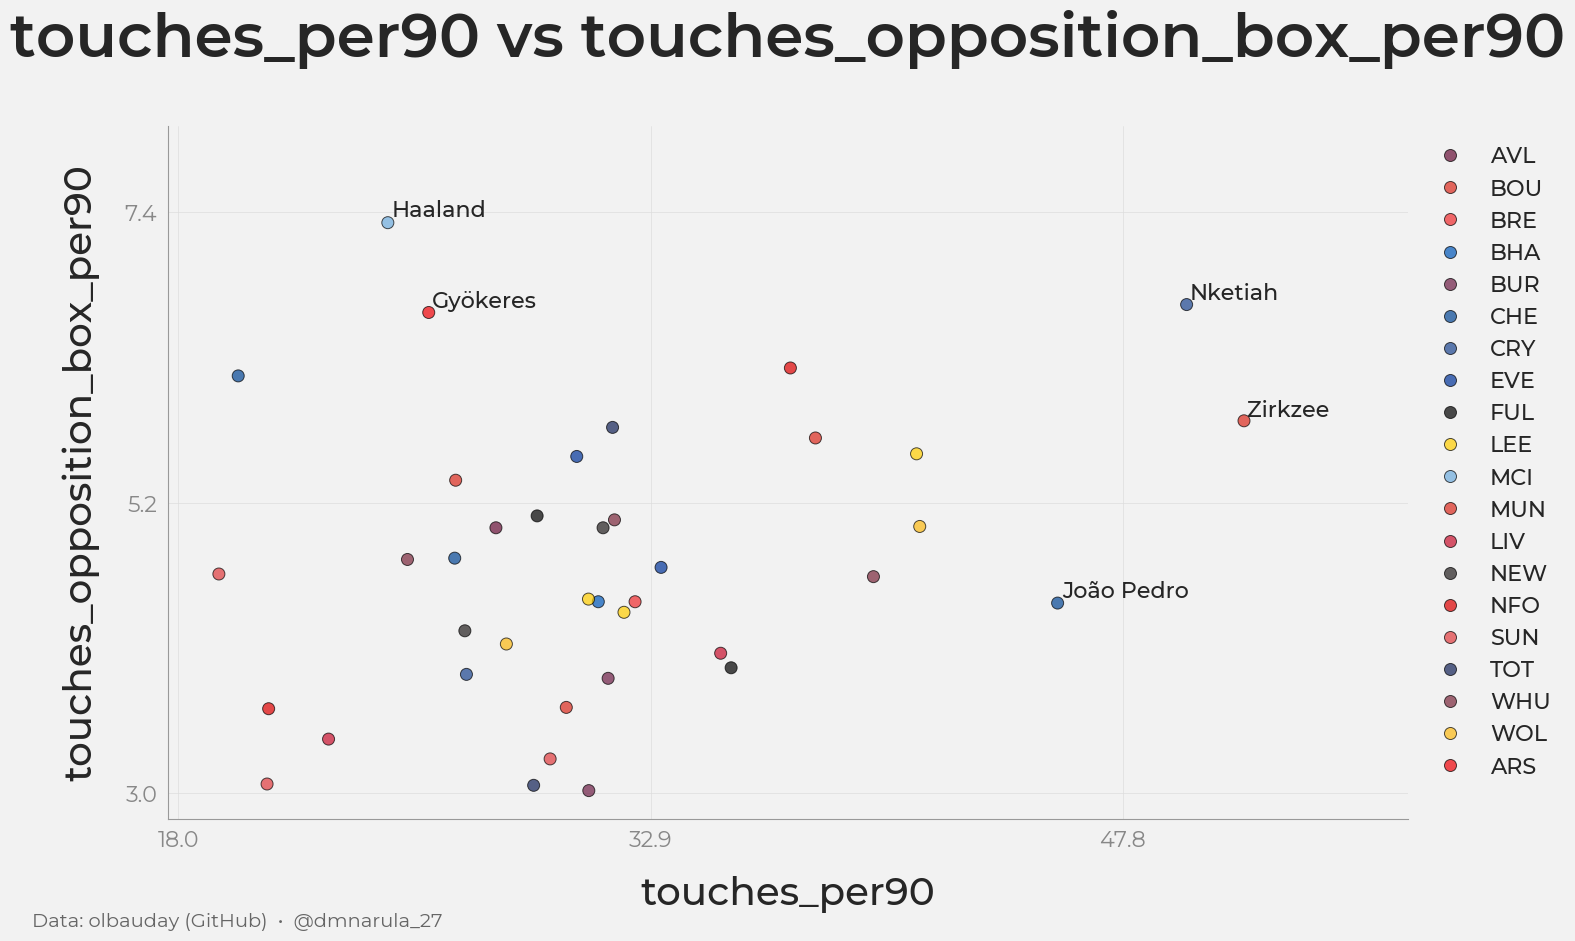

In [33]:
plot_season_scatter(df_player_season_per90[df_player_season_per90["position"] == "Forward"], "touches_per90", "touches_opposition_box_per90", fonts=FONTS)